In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import shutil
import pandas as pd
from tqdm import tqdm

### Utils Func

In [106]:
def crop_and_pad_image(image):
    if image.shape != (480, 640, 3):
        raise ValueError("Error: The input image must have shape (480, 640, 3)")

    # Crop the image to the desired region
    cropped_image = image[210:400, 64:576]

    # Calculate the number of zero pixels to add to the x-axis
    x_pad = 512 - cropped_image.shape[0]

    # Pad the image with zero pixels on both sides of the x-axis
    padded_image = np.pad(cropped_image, ((x_pad//2, x_pad//2), ( 0, 0),(0,0)), mode='constant', constant_values=0)

    return padded_image

def generate_random_beeloc(current_number, distance = (5,5), start=161, end=351):
    x_min = start
    x_max = end
    y_min = 0
    y_max = 512
    
    x1, y1 = current_number
    while True:
        x2 = random.randint(x_min, x_max)
        y2 = random.randint(y_min, y_max)
        distx = abs(x2 - x1)
        disty = abs(y2 - y1)
        if distx > distance[0] and disty>distance[1]:
            return x2, y2

def load_bee(path):
    bee = cv2.imread(path)
    bee_center = bee.shape[0]//2, bee.shape[1]//2
    return bee, bee_center

def add_image(background_image, foreground_image, x, y):
    # Get the height and width of the foreground image
    height, width, _ = foreground_image.shape

    # Copy the foreground image onto the background image
    background_image[y:y + height, x:x + width] = foreground_image
    
    return background_image

def choose_random_item(items, n):
    return random.sample(items, n)

def generate_mask(bee_annotation, bee, mask):
    dat = bee_annotation.loc[bee_annotation['img id']==bee]        
    if not math.isnan(dat['head_x']) and not math.isnan(dat['head_y']):
        mask[int(dat['head_x']),int(dat['head_y']),0] = 255
    if not math.isnan(dat['abdomen_x']) and not math.isnan(dat['abdomen_x']):
        mask[int(dat['abdomen_x']),int(dat['abdomen_x']),1] = 255
    if not math.isnan(dat['tail_x']) and not math.isnan(dat['tail_y']):
        mask[int(dat['tail_x']),int(dat['tail_y']),2] = 255
    return mask

def gaussian_smoothing(image, sigma):
    # Apply Gaussian smoothing to the image with the specified sigma value
    return cv2.GaussianBlur(image, (0, 0), sigma)

### Bee mask

In [79]:
import pandas as pd
import math
bee_path = './synthetic_data/synthetic_input/bee_im/'
bee_annotation = pd.read_csv('BeeAnnotation.csv')
bee_list = bee_annotation['img id']

def cov(size, pts):
    print(pts)
    if np.isnan(pts).any():
        return -100
    else:
        return int(size*pts//100)

In [80]:
for beeid in bee_list:
#     if beeid=='dddd81cb-132.png':
    ann = bee_annotation.loc[bee_annotation['img id']==beeid]    
#     print(beeid)
    mask = cv2.imread('./synthetic_data/synthetic_input/bee_im/'+beeid)
    mask = np.zeros_like(mask)
    size = mask.shape
    x1_ = cov(size[1], ann['head_x'])
    y1_ = cov(size[0], ann['head_y'])

    x2_ = cov(size[1], ann['abdomen_x'])
    y2_ = cov(size[0], ann['abdomen_y'])

    x3_ = cov(size[1], ann['tail_x'])
    y3_ = cov(size[0], ann['tail_y'])
    
    print(x1_, y1_,x2_, y2_, x3_, y3_)
    if (y1_!=-100) and (x1_!=-100):
        mask[y1_,x1_,0]=255
    if (y2_!=-100) and (x2_!=-100):
        mask[y2_,x2_,1]=255
    if (y3_!=-100) and (x3_!=-100):
        mask[y3_,x3_,2]=255
#     mask = cv2.circle(mask, (x1_,y1_), radius=1, color=(255, 0, 0), thickness=-1)
#     mask = cv2.circle(mask, (x2_,y2_), radius=1, color=(0, 255, 0), thickness=-1)
#     mask = cv2.circle(mask, (x3_,y3_), radius=1, color=(0, 0, 255), thickness=-1)

    cv2.imwrite('./synthetic_data/synthetic_input/bee_keypoint/'+beeid, mask)


0    35.407725
Name: head_x, dtype: float64
0    74.446086
Name: head_y, dtype: float64
0    48.497854
Name: abdomen_x, dtype: float64
0    48.301329
Name: abdomen_y, dtype: float64
0    61.373391
Name: tail_x, dtype: float64
0    13.737075
Name: tail_y, dtype: float64
18 57 25 37 32 10
1    77.55102
Name: head_x, dtype: float64
1    20.985401
Name: head_y, dtype: float64
1    51.391466
Name: abdomen_x, dtype: float64
1    38.321168
Name: abdomen_y, dtype: float64
1    24.304267
Name: tail_x, dtype: float64
1    60.766423
Name: tail_y, dtype: float64
47 13 31 23 14 37
2    49.6
Name: head_x, dtype: float64
2    72.82127
Name: head_y, dtype: float64
2    44.2
Name: abdomen_x, dtype: float64
2    46.971935
Name: abdomen_y, dtype: float64
2    42.0
Name: tail_x, dtype: float64
2    10.930576
Name: tail_y, dtype: float64
23 47 21 30 20 7
3    21.335807
Name: head_x, dtype: float64
3    41.984733
Name: head_y, dtype: float64
3    48.979592
Name: abdomen_x, dtype: float64
3    48.600509
Name

11 16 27 22 48 34
29    48.72449
Name: head_x, dtype: float64
29    71.787297
Name: head_y, dtype: float64
29    47.704082
Name: abdomen_x, dtype: float64
29    44.608567
Name: abdomen_y, dtype: float64
29    39.795918
Name: tail_x, dtype: float64
29    10.339734
Name: tail_y, dtype: float64
23 59 22 37 19 8
30    67.717996
Name: head_x, dtype: float64
30    28.11245
Name: head_y, dtype: float64
30    48.051948
Name: abdomen_x, dtype: float64
30    42.570281
Name: abdomen_y, dtype: float64
30    13.914657
Name: tail_x, dtype: float64
30    64.658635
Name: tail_y, dtype: float64
52 20 37 30 10 46
31    62.813102
Name: head_x, dtype: float64
31    25.406204
Name: head_y, dtype: float64
31    51.445087
Name: abdomen_x, dtype: float64
31    48.44904
Name: abdomen_y, dtype: float64
31    39.499037
Name: tail_x, dtype: float64
31    83.308715
Name: tail_y, dtype: float64
35 18 28 35 22 60
32    55.658627
Name: head_x, dtype: float64
32    25.091575
Name: head_y, dtype: float64
32    46.38218

61    62.395543
Name: tail_y, dtype: float64
8 13 25 18 48 26
62   NaN
Name: head_x, dtype: float64
62   NaN
Name: head_y, dtype: float64
62    58.441558
Name: abdomen_x, dtype: float64
62    8.383234
Name: abdomen_y, dtype: float64
62    22.077922
Name: tail_x, dtype: float64
62    52.894212
Name: tail_y, dtype: float64
-100 -100 25 3 9 21
63    23.562152
Name: head_x, dtype: float64
63    23.123732
Name: head_y, dtype: float64
63    46.19666
Name: abdomen_x, dtype: float64
63    44.624746
Name: abdomen_y, dtype: float64
63    75.510204
Name: tail_x, dtype: float64
63    68.965517
Name: tail_y, dtype: float64
13 12 27 24 44 37
64    73.840445
Name: head_x, dtype: float64
64    13.132911
Name: head_y, dtype: float64
64    53.432282
Name: abdomen_x, dtype: float64
64    35.759494
Name: abdomen_y, dtype: float64
64    34.879406
Name: tail_x, dtype: float64
64    75.632911
Name: tail_y, dtype: float64
38 8 27 21 18 46
65    38.519924
Name: head_x, dtype: float64
65    20.679468
Name: head

13 14 13 30 17 59
93    70.500928
Name: head_x, dtype: float64
93    75.630252
Name: head_y, dtype: float64
93    58.070501
Name: abdomen_x, dtype: float64
93    56.722689
Name: abdomen_y, dtype: float64
93    31.539889
Name: tail_x, dtype: float64
93    18.277311
Name: tail_y, dtype: float64
35 34 29 25 16 8
94    50.092764
Name: head_x, dtype: float64
94    76.545166
Name: head_y, dtype: float64
94    43.042672
Name: abdomen_x, dtype: float64
94    58.637084
Name: abdomen_y, dtype: float64
94    21.892393
Name: tail_x, dtype: float64
94    12.836767
Name: tail_y, dtype: float64
26 47 22 36 11 7
95    76.437848
Name: head_x, dtype: float64
95    80.57554
Name: head_y, dtype: float64
95    56.586271
Name: abdomen_x, dtype: float64
95    65.707434
Name: abdomen_y, dtype: float64
95    13.914657
Name: tail_x, dtype: float64
95    33.573141
Name: tail_y, dtype: float64
47 38 35 31 8 16
96    30.241187
Name: head_x, dtype: float64
96    26.616915
Name: head_y, dtype: float64
96    48.42300

121    90.538033
Name: head_x, dtype: float64
121    74.111675
Name: head_y, dtype: float64
121    59.554731
Name: abdomen_x, dtype: float64
121    61.928934
Name: abdomen_y, dtype: float64
121    15.398887
Name: tail_x, dtype: float64
121    36.294416
Name: tail_y, dtype: float64
47 28 30 23 8 13
122    55.947955
Name: head_x, dtype: float64
122    21.052632
Name: head_y, dtype: float64
122    31.97026
Name: abdomen_x, dtype: float64
122    78.421053
Name: abdomen_y, dtype: float64
122   NaN
Name: tail_x, dtype: float64
122   NaN
Name: tail_y, dtype: float64
28 7 16 28 -100 -100
123    55.888651
Name: head_x, dtype: float64
123    12.407681
Name: head_y, dtype: float64
123    46.680942
Name: abdomen_x, dtype: float64
123    38.700148
Name: abdomen_y, dtype: float64
123    39.400428
Name: tail_x, dtype: float64
123    72.67356
Name: tail_y, dtype: float64
27 8 22 27 19 51
124    69.727047
Name: head_x, dtype: float64
124    90.707965
Name: head_y, dtype: float64
124    59.305211
Name: 

155    34.953271
Name: head_x, dtype: float64
155    75.576037
Name: head_y, dtype: float64
155    43.738318
Name: abdomen_x, dtype: float64
155    51.152074
Name: abdomen_y, dtype: float64
155    49.158879
Name: tail_x, dtype: float64
155    19.047619
Name: tail_y, dtype: float64
20 55 26 37 29 13
156    58.998145
Name: head_x, dtype: float64
156    36.51772
Name: head_y, dtype: float64
156    41.558442
Name: abdomen_x, dtype: float64
156    67.950693
Name: abdomen_y, dtype: float64
156   NaN
Name: tail_x, dtype: float64
156   NaN
Name: tail_y, dtype: float64
25 19 18 36 -100 -100
157    53.432282
Name: head_x, dtype: float64
157    11.678832
Name: head_y, dtype: float64
157    51.020408
Name: abdomen_x, dtype: float64
157    35.40146
Name: abdomen_y, dtype: float64
157    38.961039
Name: tail_x, dtype: float64
157    73.175182
Name: tail_y, dtype: float64
33 7 32 22 24 46
158    46.624473
Name: head_x, dtype: float64
158    69.616519
Name: head_y, dtype: float64
158    43.037975
Name

184    66.728972
Name: head_x, dtype: float64
184    18.834081
Name: head_y, dtype: float64
184    52.336449
Name: abdomen_x, dtype: float64
184    40.657698
Name: abdomen_y, dtype: float64
184    41.495327
Name: tail_x, dtype: float64
184    80.717489
Name: tail_y, dtype: float64
37 13 29 28 23 56
185    47.5
Name: head_x, dtype: float64
185    1.181684
Name: head_y, dtype: float64
185    47.083333
Name: abdomen_x, dtype: float64
185    27.17873
Name: abdomen_y, dtype: float64
185    40.208333
Name: tail_x, dtype: float64
185    80.206795
Name: tail_y, dtype: float64
18 0 18 14 15 44
186   NaN
Name: head_x, dtype: float64
186   NaN
Name: head_y, dtype: float64
186    45.083488
Name: abdomen_x, dtype: float64
186    45.125786
Name: abdomen_y, dtype: float64
186    46.938776
Name: tail_x, dtype: float64
186    6.918239
Name: tail_y, dtype: float64
-100 -100 17 20 18 3
187    58.317757
Name: head_x, dtype: float64
187    14.483821
Name: head_y, dtype: float64
187    44.11215
Name: abdome

212    46.19666
Name: abdomen_x, dtype: float64
212    30.938124
Name: abdomen_y, dtype: float64
212    48.423006
Name: tail_x, dtype: float64
212    69.061876
Name: tail_y, dtype: float64
-100 -100 26 16 27 36
213    15.955473
Name: head_x, dtype: float64
213    68.010076
Name: head_y, dtype: float64
213    31.539889
Name: abdomen_x, dtype: float64
213    53.400504
Name: abdomen_y, dtype: float64
213    73.469388
Name: tail_x, dtype: float64
213    21.914358
Name: tail_y, dtype: float64
9 28 17 22 41 9
214    42.056075
Name: head_x, dtype: float64
214    16.158537
Name: head_y, dtype: float64
214    52.149533
Name: abdomen_x, dtype: float64
214    39.786585
Name: abdomen_y, dtype: float64
214    59.065421
Name: tail_x, dtype: float64
214    78.810976
Name: tail_y, dtype: float64
26 12 32 30 36 59
215    46.168224
Name: head_x, dtype: float64
215    78.995434
Name: head_y, dtype: float64
215    39.439252
Name: abdomen_x, dtype: float64
215    56.164384
Name: abdomen_y, dtype: float64
2

240    45.454545
Name: head_x, dtype: float64
240    13.274336
Name: head_y, dtype: float64
240    43.2282
Name: abdomen_x, dtype: float64
240    39.646018
Name: abdomen_y, dtype: float64
240    45.269017
Name: tail_x, dtype: float64
240    75.575221
Name: tail_y, dtype: float64
28 8 27 26 28 49
241    62.155963
Name: head_x, dtype: float64
241    14.771049
Name: head_y, dtype: float64
241    49.311927
Name: abdomen_x, dtype: float64
241    47.858198
Name: abdomen_y, dtype: float64
241    48.853211
Name: tail_x, dtype: float64
241    86.853767
Name: tail_y, dtype: float64
23 8 18 28 18 51
242    48.423006
Name: head_x, dtype: float64
242    54.361055
Name: head_y, dtype: float64
242   NaN
Name: abdomen_x, dtype: float64
242   NaN
Name: abdomen_y, dtype: float64
242   NaN
Name: tail_x, dtype: float64
242   NaN
Name: tail_y, dtype: float64
22 23 -100 -100 -100 -100
243    50.901804
Name: head_x, dtype: float64
243    82.274742
Name: head_y, dtype: float64
243    54.108216
Name: abdomen_x

268    47.228916
Name: tail_x, dtype: float64
268    12.979351
Name: tail_y, dtype: float64
24 51 21 37 19 8
269    13.754647
Name: head_x, dtype: float64
269    39.628483
Name: head_y, dtype: float64
269    38.104089
Name: abdomen_x, dtype: float64
269    34.98452
Name: abdomen_y, dtype: float64
269    81.412639
Name: tail_x, dtype: float64
269    32.817337
Name: tail_y, dtype: float64
8 15 24 13 52 12
270    61.410019
Name: head_x, dtype: float64
270    83.576642
Name: head_y, dtype: float64
270    46.567718
Name: abdomen_x, dtype: float64
270    67.335766
Name: abdomen_y, dtype: float64
270    24.675325
Name: tail_x, dtype: float64
270    29.379562
Name: tail_y, dtype: float64
36 50 27 40 14 17
271    51.533742
Name: head_x, dtype: float64
271    18.611521
Name: head_y, dtype: float64
271    56.850716
Name: abdomen_x, dtype: float64
271    44.460857
Name: abdomen_y, dtype: float64
271    58.282209
Name: tail_x, dtype: float64
271    85.819793
Name: tail_y, dtype: float64
26 13 29 32

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


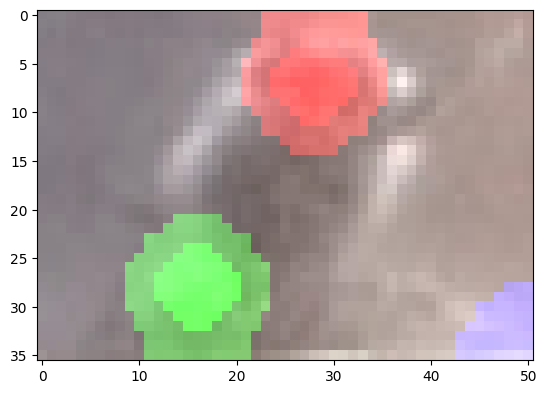

In [61]:
def gaussian_smoothing(image, sigma):
    # Apply Gaussian smoothing to the image with the specified sigma value
    return cv2.GaussianBlur(image, (0, 0), sigma)

img_name = '6b74fb88-147.png'
mask = cv2.imread('./ann/'+img_name)
img = cv2.imread('./37/'+img_name)

gus = gaussian_smoothing(mask, sigma=4)
gus = gus/gus.max()
img = img/img.max() + gus
plt.imshow(img)

### Bee PAF

In [91]:
import pandas as pd
import math
bee_path = './synthetic_data/synthetic_input/bee_im/'
bee_annotation = pd.read_csv('BeeAnnotation.csv')
bee_list = bee_annotation['img id']

def cov(size, pts):
    if np.isnan(pts).any():
        return (-100)
    else:
        return int(size*pts//100)

def get_paf(img, keypoints, sigma_paf, variable_width):
    out_pafs = np.zeros((len(BODY_PARTS), 2, img.shape[0], img.shape[1]))
    n_person_part = np.zeros((len(BODY_PARTS),img.shape[0],img.shape[1]))
    for person_id in range(keypoints.shape[0]):
        keypoints_person = keypoints[person_id]
        for i in range(len(BODY_PARTS)):
            part = BODY_PARTS[i]
            keypoint_1 = keypoints_person[part[0], :2]
            keypoint_2 = keypoints_person[part[1], :2]
            if keypoints_person[part[0], 2] > 0 and keypoints_person[part[1], 2] > 0:
                part_line_segment = keypoint_2 - keypoint_1
                # Notation from paper
                l = np.linalg.norm(part_line_segment)
                if l>1e-2:
                    sigma = sigma_paf
                    if variable_width:
                        sigma = sigma_paf *  l * 0.025
                    v = part_line_segment/l
                    v_per = v[1], -v[0]
                    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
                    dist_along_part = v[0] * (x - keypoint_1[0]) + v[1] * (y - keypoint_1[1])
                    dist_per_part = np.abs(v_per[0] * (x - keypoint_1[0]) + v_per[1] * (y - keypoint_1[1]))
                    mask1 = dist_along_part >= 0
                    mask2 = dist_along_part <= l
                    mask3 = dist_per_part <= sigma
                    mask = mask1 & mask2 & mask3
                    out_pafs[i, 0] = out_pafs[i, 0] + mask.astype('float32') * v[0]
                    out_pafs[i, 1] = out_pafs[i, 1] + mask.astype('float32') * v[1]
                    n_person_part[i] += mask.astype('float32')
    n_person_part = n_person_part.reshape(out_pafs.shape[0], 1, img.shape[0], img.shape[1])
    out_pafs = out_pafs/(n_person_part + 1e-8)
    return out_pafs

In [102]:
for beeid in bee_list:
    print(beeid)
    sigma_paf = 4
    variable_width = True
    BODY_PARTS = [[0, 1]]
    ann = bee_annotation.loc[bee_annotation['img id']==beeid]    
    mask = cv2.imread('./synthetic_data/synthetic_input/bee_im/'+beeid)
    size = mask.shape
    print(size)
    x1_ = cov(size[1], ann['head_x'])
    y1_ = cov(size[0], ann['head_y'])

    x2_ = cov(size[1], ann['abdomen_x'])
    y2_ = cov(size[0], ann['abdomen_y'])

    x3_ = cov(size[1], ann['tail_x'])
    y3_ = cov(size[0], ann['tail_y'])
    
    print(x1_, y1_,x2_, y2_)

    if (x1_==-100) or (y1_==-100) or (x2_==-100) or (y2_==-100):
        ha_pafs = np.zeros((1,2,size[0],size[1]))
    else:
        ha_keypoints = np.array([[[x1_, y1_, 1], [x2_, y2_, 1]]])
        ha_pafs = get_paf(img=mask, keypoints=ha_keypoints, sigma_paf=sigma_paf, variable_width=variable_width)
    print(ha_pafs.shape)
    print("88888888")
    print(size)
    print(x2_, y2_, x3_, y3_)
    if (x2_==-100) or (y2_==-100) or (x3_==-100) or (y3_==-100):
        at_pafs = np.zeros((1,2,size[0],size[1]))
    else:
        at_keypoints = np.array([[[x2_, y2_, 1], [x3_, y3_, 1]]])
        at_pafs = get_paf(img=mask, keypoints=at_keypoints, sigma_paf=sigma_paf, variable_width=variable_width)
    
    print(at_pafs.shape)
    paf = np.stack((ha_pafs,at_pafs), axis=0)

    np.save('./synthetic_data/synthetic_input/bee_paf/'+os.path.splitext(beeid)[0], paf)
    
#     cv2.imwrite('./ann/'+beeid, mask)
# plt.imshow(mask)

005e61b8-275.png
(77, 53, 3)
18 57 25 37
(1, 2, 77, 53)
88888888
(77, 53, 3)
25 37 32 10
(1, 2, 77, 53)
010e3e4d-138.png
(62, 61, 3)
47 13 31 23
(1, 2, 62, 61)
88888888
(62, 61, 3)
31 23 14 37
(1, 2, 62, 61)
01d94a49-50.png
(65, 48, 3)
23 47 21 30
(1, 2, 65, 48)
88888888
(65, 48, 3)
21 30 20 7
(1, 2, 65, 48)
04d94500-133.png
(54, 74, 3)
15 22 36 26
(1, 2, 54, 74)
88888888
(54, 74, 3)
36 26 62 38
(1, 2, 54, 74)
0596b3da-253.png
(87, 71, 3)
50 21 40 39
(1, 2, 87, 71)
88888888
(87, 71, 3)
40 39 24 63
(1, 2, 87, 71)
06507262-30.png
(44, 59, 3)
5 8 27 12
(1, 2, 44, 59)
88888888
(44, 59, 3)
27 12 40 34
(1, 2, 44, 59)
0702ada1-245.png
(60, 56, 3)
13 30 24 24
(1, 2, 60, 56)
88888888
(60, 56, 3)
24 24 46 13
(1, 2, 60, 56)
07087129-89.png
(78, 51, 3)
25 57 25 36
(1, 2, 78, 51)
88888888
(78, 51, 3)
25 36 24 8
(1, 2, 78, 51)
07689e29-176.png
(75, 61, 3)
22 59 28 38
(1, 2, 75, 61)
88888888
(75, 61, 3)
28 38 34 14
(1, 2, 75, 61)
077d9acd-168.png
(70, 45, 3)
29 16 25 33
(1, 2, 70, 45)
88888888
(70, 4

502bcac7-161.png
(60, 54, 3)
25 9 26 25
(1, 2, 60, 54)
88888888
(60, 54, 3)
26 25 22 51
(1, 2, 60, 54)
505e97a5-241.png
(39, 43, 3)
-100 -100 15 1
(1, 2, 39, 43)
88888888
(39, 43, 3)
15 1 21 29
(1, 2, 39, 43)
520ad501-90.png
(71, 32, 3)
13 14 13 30
(1, 2, 71, 32)
88888888
(71, 32, 3)
13 30 17 59
(1, 2, 71, 32)
52232e5f-91.png
(45, 51, 3)
35 34 29 25
(1, 2, 45, 51)
88888888
(45, 51, 3)
29 25 16 8
(1, 2, 45, 51)
52399c53-108.png
(62, 53, 3)
26 47 22 36
(1, 2, 62, 53)
88888888
(62, 53, 3)
22 36 11 7
(1, 2, 62, 53)
53747a81-295.png
(48, 62, 3)
47 38 35 31
(1, 2, 48, 62)
88888888
(48, 62, 3)
35 31 8 16
(1, 2, 48, 62)
53a05aa1-240.png
(50, 67, 3)
20 13 32 20
(1, 2, 50, 67)
88888888
(50, 67, 3)
32 20 55 35
(1, 2, 50, 67)
53f1a68e-310.png
(62, 55, 3)
21 42 26 27
(1, 2, 62, 55)
88888888
(62, 55, 3)
26 27 30 1
(1, 2, 62, 55)
55692190-85.png
(61, 46, 3)
21 9 19 25
(1, 2, 61, 46)
88888888
(61, 46, 3)
19 25 15 51
(1, 2, 61, 46)
5589c974-82.png
(76, 48, 3)
18 58 20 37
(1, 2, 76, 48)
88888888
(76, 48

(1, 2, 50, 38)
9ff5258f-48.png
(63, 38, 3)
18 55 18 37
(1, 2, 63, 38)
88888888
(63, 38, 3)
18 37 17 8
(1, 2, 63, 38)
a09f2f1e-40.png
(35, 65, 3)
16 19 31 20
(1, 2, 35, 65)
88888888
(35, 65, 3)
31 20 55 8
(1, 2, 35, 65)
a1061ca2-210.png
(67, 41, 3)
23 55 26 42
(1, 2, 67, 41)
88888888
(67, 41, 3)
26 42 30 8
(1, 2, 67, 41)
a2c261c7-273.png
(76, 63, 3)
46 58 31 41
(1, 2, 76, 63)
88888888
(76, 63, 3)
31 41 14 19
(1, 2, 76, 63)
a474912f-113.png
(61, 59, 3)
24 17 27 35
(1, 2, 61, 59)
88888888
(61, 59, 3)
27 35 34 57
(1, 2, 61, 59)
a52fd5c0-238.png
(64, 38, 3)
22 54 19 43
(1, 2, 64, 38)
88888888
(64, 38, 3)
19 43 14 12
(1, 2, 64, 38)
a5305998-5.png
(73, 61, 3)
26 18 29 34
(1, 2, 73, 61)
88888888
(73, 61, 3)
29 34 32 64
(1, 2, 73, 61)
a6037968-303.png
(47, 62, 3)
52 33 34 21
(1, 2, 47, 62)
88888888
(47, 62, 3)
34 21 10 13
(1, 2, 47, 62)
a6bbc9a8-B1.png
(70, 56, 3)
37 13 29 28
(1, 2, 70, 56)
88888888
(70, 56, 3)
29 28 23 56
(1, 2, 70, 56)
a82ef76d-297.png
(55, 39, 3)
18 0 18 14
(1, 2, 55, 39)
88

(1, 2, 57, 37)
88888888
(57, 37, 3)
19 22 19 47
(1, 2, 57, 37)
e7a3bffd-146.png
(77, 54, 3)
32 12 31 29
(1, 2, 77, 54)
88888888
(77, 54, 3)
31 29 32 59
(1, 2, 77, 54)
e826b509-65.png
(61, 44, 3)
18 53 24 37
(1, 2, 61, 44)
88888888
(61, 44, 3)
24 37 30 13
(1, 2, 61, 44)
e8a54cd8-12.png
(24, 30, 3)
10 9 -100 -100
(1, 2, 24, 30)
88888888
(24, 30, 3)
-100 -100 -100 -100
(1, 2, 24, 30)
e97ca1e6-249.png
(66, 58, 3)
31 59 29 41
(1, 2, 66, 58)
88888888
(66, 58, 3)
29 41 23 16
(1, 2, 66, 58)
ea210318-174.png
(79, 57, 3)
28 17 25 37
(1, 2, 79, 57)
88888888
(79, 57, 3)
25 37 3 59
(1, 2, 79, 57)
ea64722e-258.png
(50, 66, 3)
43 37 32 26
(1, 2, 50, 66)
88888888
(50, 66, 3)
32 26 17 9
(1, 2, 50, 66)
ea771be7-239.png
(46, 46, 3)
-100 -100 32 39
(1, 2, 46, 46)
88888888
(46, 46, 3)
32 39 22 7
(1, 2, 46, 46)
ea9b36a1-150.png
(66, 52, 3)
28 9 24 29
(1, 2, 66, 52)
88888888
(66, 52, 3)
24 29 25 54
(1, 2, 66, 52)
ec33ed46-105.png
(76, 52, 3)
30 15 28 33
(1, 2, 76, 52)
88888888
(76, 52, 3)
28 33 24 61
(1, 2, 

In [26]:
paf[0].max()

0.9734171531610312

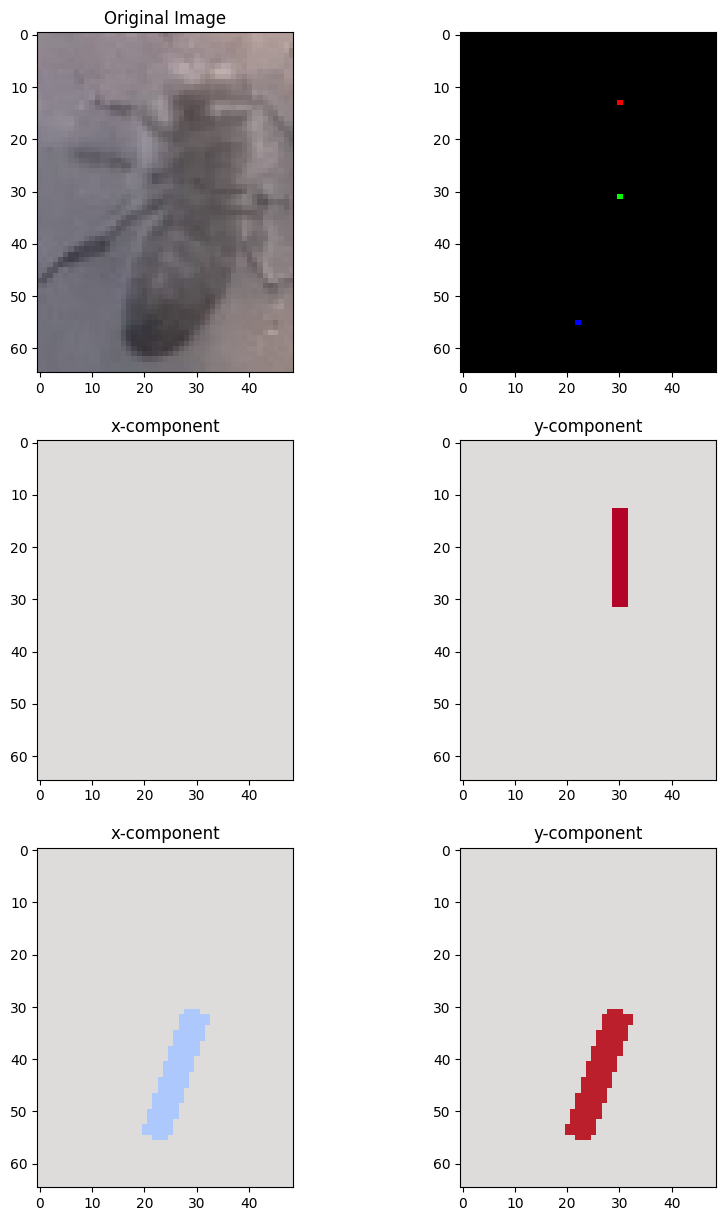

In [287]:
im = cv2.imread('./37/97286ac1-83.png')
ms = cv2.imread('./ann/97286ac1-83.png')
paf = np.load('./paf/97286ac1-83.npy')

ha__paf = paf[0]
at__paf = paf[1]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
ax[0, 0].imshow(im, cmap='gray')
ax[0, 1].imshow(ms, cmap='gray')

ax[0, 0].set_title('Original Image')
ax[1, 0].imshow(ha__paf[0, 0], cmap='coolwarm', vmin=-1, vmax=1)
ax[1, 1].imshow(ha__paf[0, 1], cmap='coolwarm', vmin=-1, vmax=1)
ax[2, 0].imshow(at__paf[0, 0], cmap='coolwarm', vmin=-1, vmax=1)
ax[2, 1].imshow(at__paf[0, 1], cmap='coolwarm', vmin=-1, vmax=1)
ax[1, 0].set_title('x-component')
ax[1, 1].set_title('y-component')
ax[2, 0].set_title('x-component')
ax[2, 1].set_title('y-component')
plt.show()

### Synthetica data parameter

In [103]:
bees_per_img = (2, 10) # min, max
#Load Background
background_path = './synthetic_data/synthetic_input/Background/'
bck_list = os.listdir(background_path)
 
crop_path = './synthetic_data/synthetic_input'
#Load Bees
bee_path = os.path.join(crop_path,'bee_im')
ann_path = os.path.join(crop_path,'bee_keypoint')
paf_path = os.path.join(crop_path, 'bee_paf')

bee_list = os.listdir(ann_path)
print('Total Background images : {} and Total Bee Images :{} '.format(len(bck_list), len(bee_list)))

Total Background images : 165 and Total Bee Images :287 


In [104]:
def generate_points(pts, min_distance):
    min_x = 161
    max_x = 351
    min_y = 50
    max_y = 462
    points = []

    for i in range(pts):
        x = random.randint(min_x, max_x)
        y = random.randint(min_y, max_y)
        if i == 0:
            points.append((x, y))
        else:
            prev_x, prev_y = points[-1]
            while abs(x - prev_x) < min_distance:
                x = random.randint(min_x, max_x)
            points.append((x, y))

    return points


In [107]:
syn_num = 0
bee_annotation = pd.read_csv('BeeAnnotation.csv')

for i in tqdm(range(0,10)):
#     print('IMG generated : {}'.format(syn_num))
    background_img = choose_random_item(bck_list, n=1)
    bee_imgs = choose_random_item(bee_list, n=choose_random_item(list(range(bees_per_img[0], bees_per_img[1] + 1)), 
                                                                 n=1)[0])
#     print(background_img, bee_imgs)
    
    bck_img = cv2.imread(os.path.join(background_path, background_img[0]))
    bck_img = crop_and_pad_image(bck_img)
    bck_msk = np.zeros((bck_img.shape[0],bck_img.shape[1],7))
#     print(bck_img.shape)
    loc_list = generate_points(pts=len(bee_imgs), min_distance=50)
    for bee, loc in zip(bee_imgs,loc_list):
#         print('loading bee')
        im_bee = cv2.imread(os.path.join(bee_path, bee))
        msk_bee = cv2.imread(os.path.join(ann_path, bee))
        paf = np.load(os.path.join(paf_path,os.path.splitext(bee)[0]+'.npy'))
        
        ha_paf = np.transpose(paf[0,0], (1,2,0))
        at_paf = np.transpose(paf[1,0], (1,2,0))

        width, height, _ = im_bee.shape
        y, x = loc
        
        small_h, small_w = im_bee.shape[:2]
        x_start = x - small_w//2
        y_start = y - small_h//2
        x_end = x_start + small_w
        y_end = y_start + small_h
        bck_img[y_start:y_end, x_start:x_end,:] = im_bee
        bck_msk[y_start:y_end, x_start:x_end,:3] = msk_bee
        bck_msk[y_start:y_end, x_start:x_end,3:5] = ha_paf
        bck_msk[y_start:y_end, x_start:x_end,5:] = at_paf

        
    cv2.imwrite('./synthetic_data/synthetic_results/Images/SYNBEE_'+str(syn_num)+'.png', bck_img)
    np.save('./synthetic_data/synthetic_results/Masks/SYNBEE_'+str(syn_num)+'.npy', bck_msk)
    syn_num+=1
#     print('$$$$$$')

100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  9.26it/s]


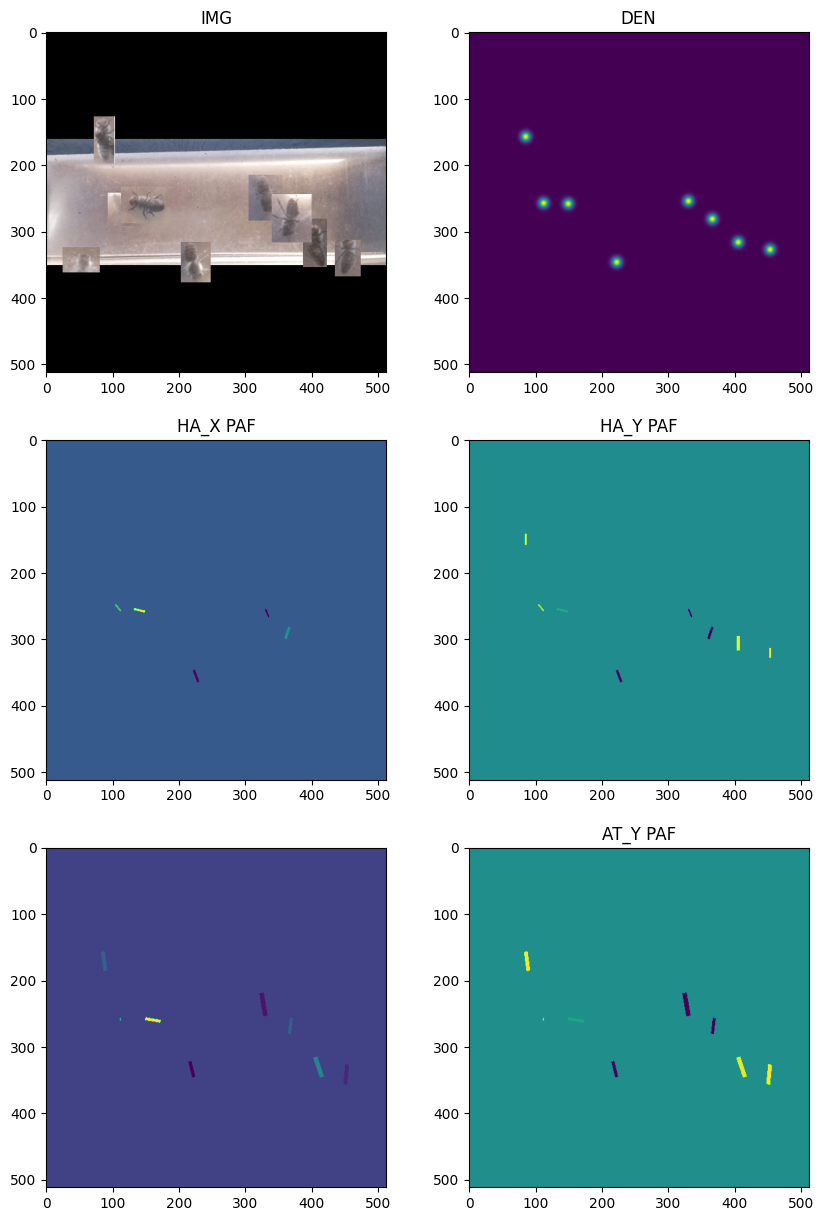

In [110]:
im = cv2.imread('./synthetic_data/synthetic_results/Images/SYNBEE_0.png')
msk = np.load('./synthetic_data/synthetic_results/Masks/SYNBEE_0.npy')
gus = gaussian_smoothing(msk[:,:,1], 5)
gus=gus/gus.max()


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Plot the first image in the first subplot
axes[0,0].imshow(im)
axes[0,0].set_title('IMG')

# Plot the second image in the second subplot
axes[0,1].imshow(gus)
axes[0,1].set_title('DEN')

# Plot the third image in the third subplot
axes[1,0].imshow(msk[:,:,3])
axes[1,0].set_title('HA_X PAF')

axes[1,1].imshow(msk[:,:,4])
axes[1,1].set_title('HA_Y PAF')

axes[2,0].imshow(msk[:,:,5])
axes[2,1].set_title('AT_X PAF')

axes[2,1].imshow(msk[:,:,6])
axes[2,1].set_title('AT_Y PAF')


# Display the resulting plot
plt.show()

### Test PAF

In [330]:
def testpaf(pt1,pt2, out_pafs):
    # Define points of interest
        pt1 = np.array(pt1)
        pt2 = np.array(pt2)

        # Calculate unit vector and length of line
        line_vector = pt2 - pt1
        line_length = np.linalg.norm(line_vector)
        line_unit_vector = line_vector / line_length

        # Define width of line integral (should match `sigma` used in `get_paf`)
        line_integral_width = 3

        # Initialize line integral variables
        line_integral_x = 0
        line_integral_y = 0
        line_integral_weight = 0

        # Loop over points in PAF along line
        for i in range(int(line_length)):
            # Calculate point on line
            pt = pt1 + line_unit_vector * i
            x = int(round(pt[0]))
            y = int(round(pt[1]))

            # Calculate weight for line integral (Gaussian function)
            weight = np.exp(-0.5 * ((i / line_length) ** 2) / (line_integral_width ** 2))

            # Add contribution to line integral
            line_integral_x += weight * out_pafs[0, 0, y, x]
            line_integral_y += weight * out_pafs[0, 1, y, x]
            line_integral_weight += weight

        # Calculate final PAF values along line
        paf_x = line_integral_x / line_integral_weight
        paf_y = line_integral_y / line_integral_weight

        # Check if PAF values are above threshold (e.g., 0.1)
        if paf_x ** 2 + paf_y ** 2 > 0.8 ** 2:
            print('Line is supported by PAF. ' + str(paf_x ** 2 + paf_y ** 2))
        else:
            print('Line is not supported by PAF. '+ str(paf_x ** 2 + paf_y ** 2))


In [331]:
testpaf((10,25),(30,25),at_pafs)

Line is not supported by PAF. 0.021677830176658922


255.0 0.0
139.14827520554394 0.0


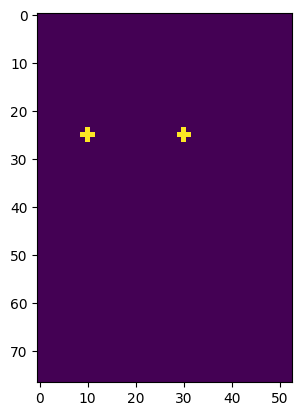

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Line is supported by PAF.


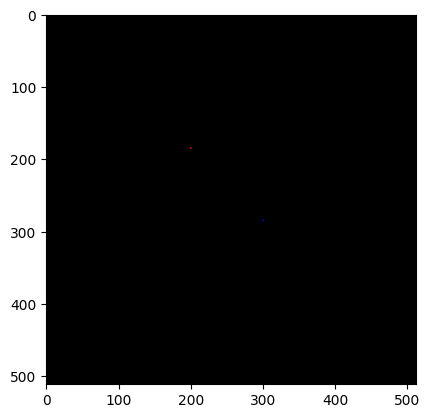

In [55]:
test_paf = np.zeros((512,512,3))
x= 15
pt1 = (200,200-x)
pt2 = (300,300-x)
pt3 = (100,100)
pt4 = (100,300)
pt5 = (300,100)


test_paf = cv2.circle(test_paf, pt1, radius=1, color=(255, 0, 0), thickness=-1)
test_paf = cv2.circle(test_paf, pt2, radius=1, color=(0, 0, 255), thickness=-1)
# test_paf = cv2.circle(test_paf, pt3, radius=1, color=(0, 0, 255), thickness=-1)
# test_paf = cv2.circle(test_paf, pt4, radius=1, color=(0, 0, 255), thickness=-1)
# test_paf = cv2.circle(test_paf, pt5, radius=1, color=(0, 0, 255), thickness=-1)
plt.imshow(test_paf)
testpaf(pt1,pt2)

In [ ]:
import matplotlib.pyplot as plt
print(out_pafs[0,0].max(), out_pafs[0,1].max())
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(out_pafs[0, 0], cmap='coolwarm', vmin=-1, vmax=1)
ax[1].imshow(out_pafs[0, 1], cmap='coolwarm', vmin=-1, vmax=1)
ax[0].set_title('x-component')
ax[1].set_title('y-component')
plt.show()
